# Image classification based on the k-Nearest Neighbour and Deep Neural Network using SVHN data

## Problem Statement:

Recognizing multi-digit numbers in photographs captured at street level is an important component of modern-day map making. A classic example of a corpus of such street level photographs is Google’s Street View imagery comprised of hundreds of millions of geo-located 360 degree panoramic images. The ability to automatically transcribe an address number from a geo-located patch of pixels and associate the transcribed number with a known street address helps pinpoint, with a high degree of accuracy, the location of the building it represents.


More broadly, recognizing numbers in photographs is a problem of interest to the optical character recognition community. While OCR on constrained domains like document processing is well studied, arbitrary multi-character text recognition in photographs is still highly challenging. This difficulty arises due to the wide variability in the visual appearance of text in the wild on account of a large range of fonts, colors, styles, orientations, and character arrangements. The recognition problem is further complicated by environmental factors such as lighting, shadows, specularities, and occlusions as well as by image acquisition factors such as resolution, motion, and focus blurs.

## Project Description:

In this hands-on project the goal is to build a python code for image classification from scratch to understand the nitty gritties of building and training a model and further to understand the advantages of neural networks. 

First we will implement a simple KNN classifier and later implement a Neural Network to classify the images in the SVHN dataset. We will compare the computational efficiency and accuracy between the traditional methods and neural networks.

## Data Description:

SVHN (Street View House Numbers) is a real-world image dataset for developing machine learning and object recognition algorithms with minimal requirement on data formatting but comes from a significantly harder, unsolved, real world problem (recognizing digits and numbers in natural scene images). SVHN is obtained from house numbers in Google Street View images.

The goal of this project is to take an image from the SVHN dataset and determine what that digit is. This is a multi-class classification problem with 10 classes, one for each digit 0-9. Digit '1' has label 1, '9' has label 9 and '0' has label 10.

Although, there are close to 6,00,000 images in this dataset, we have extracted 60,000 images
(42000 training and 18000 test images) to do this project. The data comes in a MNIST-like format of 32-by-32 RGB images centred around a single digit (many of the images do contain some distractors at the sides).

Refer to Olympus for project related files and instructions.

### Data Set:

● The name of the dataset is SVHN_single_grey1.h5

● The data is a subset of the original dataset. Use this subset only for the project.

● Keep a copy of your dataset in your own google drive.

## Project Objectives:

The objective of the project is to learn how to implement a simple image classification pipeline based on the k-Nearest Neighbour and a deep neural network. The goals of this assignment are as follows:

### 1) Understand the basic Image Classification pipeline and the data-driven approach (train/predict stages)

##### Image classification:
Image classification refers to a process in computer vision that can classify an image according to its visual content and this is a supervised learning problem: which is the task of assigning an input image one label from a fixed set of categories.
    
Early computer vision models relied on raw pixel data as the input to the model. However raw pixel data alone doesn't provide a sufficiently stable representation to encompass variations of an object as captured in an image. The position of the object, background behind the object, ambient lighting, camera angle and camera focus all can produce fluctuation in raw pixel data. Computer vision models extracts new features from pixel data, such as color histograms, textures and shapes etc...
    
Image classification can be broadly categorized into binary, multi-class and multi-label classification problems. Binary classification involves assigning one of the two class labels to an instance. In multi-class classification problem, an instance should be categorized into one of more than two classes. Multi-label classification is a generalized version of the multi-class classification problem where each image is assigned multiple labels as opposed to a single label. 


#####  Image classification pipeline:
Task in Image Classification is to take an array of pixels that represents a single image and assign a label to it. A complete image classification pipeline can be formalized as below:

   * Input: Input (training set) consists of a set of N images, each labeled with one of K different classes. 

   * Learning: Use the training set to learn what each one of the classes looks like. This process is training the classifier or learning a model. Learning is based on optmizing (reducing) loss; loss is calculated comparing true labels of the images with the one computed by the classifier and weights/inputs were adjusted as part of Backpropagation process.

   * Evaluation: Once training is complete, trained classifier or model is evaluated by asking it to predict labels for a new set (validation or test set) of images that it has never seen before. 


##### Data-driven approach: 
When we write an algorithm that can classify images into distinct categories, the approach is providing the machine with many examples of each class and then develop learning algorithms that look at these examples and learn about the visual appearance of each class. Prediction on validation/test set relies on training with dataset of labeled images.

### 2) Data fetching and understand the train/test splits. (5 points)

##### ** Importing necessary libraries **

In [1]:
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt

import seaborn as sns
sns.set(style='darkgrid', rc={'figure.figsize':(8,6)})

import warnings
warnings.simplefilter('ignore')
warnings.filterwarnings('ignore')

In [2]:
import os 
print(os.getcwd())

C:\Users\Venkatesh K Govindan\PGP-AIML\Project\Residency-7\NeuralNets-and-Deep-Learning-Project


##### ** Opening SVHN dataset from h5 file **

In [3]:
import h5py
SVHN_data=h5py.File('SVHN_single_grey1.h5','r')

##### ** Loading SVHN Train and Test  **

In [4]:
X_train=SVHN_data['X_train'][:]
y_train=SVHN_data['y_train'][:]
X_test=SVHN_data['X_test'][:]
y_test=SVHN_data['y_test'][:]

In [5]:
SVHN_data.close()

##### ** No. of samples in Train and Test sets **

In [6]:
print(X_train.shape[0], 'Samples in Train set')
print(X_test.shape[0], 'Samples in Test set')

42000 Samples in Train set
18000 Samples in Test set


##### ** Verifying data distribution for each class in label sets **

In [7]:
np.unique(y_train,return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([4186, 4172, 4197, 4281, 4188, 4232, 4168, 4192, 4188, 4196],
       dtype=int64))

In [8]:
np.unique(y_test,return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([1814, 1828, 1803, 1719, 1812, 1768, 1832, 1808, 1812, 1804],
       dtype=int64))

##### ** There are 10 classes and samples are almost equally distributed for each classes **

##### ** Printing Shape and DataType of Train and Test sets **

In [9]:
print('*** Train Set ***')
print("Shape of X_train :", X_train.shape,"and Data Type :", X_train.dtype)
print("Shape of y_train :", y_train.shape,"and Data Type :", y_train.dtype)
print('\n')
print('*** Test Set ***')
print("Shape of X_test :", X_test.shape,"and Data Type :", X_test.dtype)
print("Shape of y_test :", y_test.shape,"and Data Type :", y_test.dtype)

*** Train Set ***
Shape of X_train : (42000, 32, 32) and Data Type : float32
Shape of y_train : (42000,) and Data Type : uint8


*** Test Set ***
Shape of X_test : (18000, 32, 32) and Data Type : float32
Shape of y_test : (18000,) and Data Type : uint8


##### ** Dimensions of an Image in Train and Test sets **

In [10]:
print('*** Train Set ***')
print('Image Dimension :',X_train[0].shape)
print('Image Height    :',X_train[0].shape[0])
print('Image Width     :',X_train[0].shape[1])
print('\n')
print('*** Test Set ***')
print('Image Dimension :',X_test[0].shape)
print('Image Height    :',X_test[0].shape[0])
print('Image Width     :',X_test[0].shape[1])

*** Train Set ***
Image Dimension : (32, 32)
Image Height    : 32
Image Width     : 32


*** Test Set ***
Image Dimension : (32, 32)
Image Height    : 32
Image Width     : 32


###### ** Plotting samples from SVHN Train and Test set **

In [11]:
np.random.seed=99

*** Train Set ***


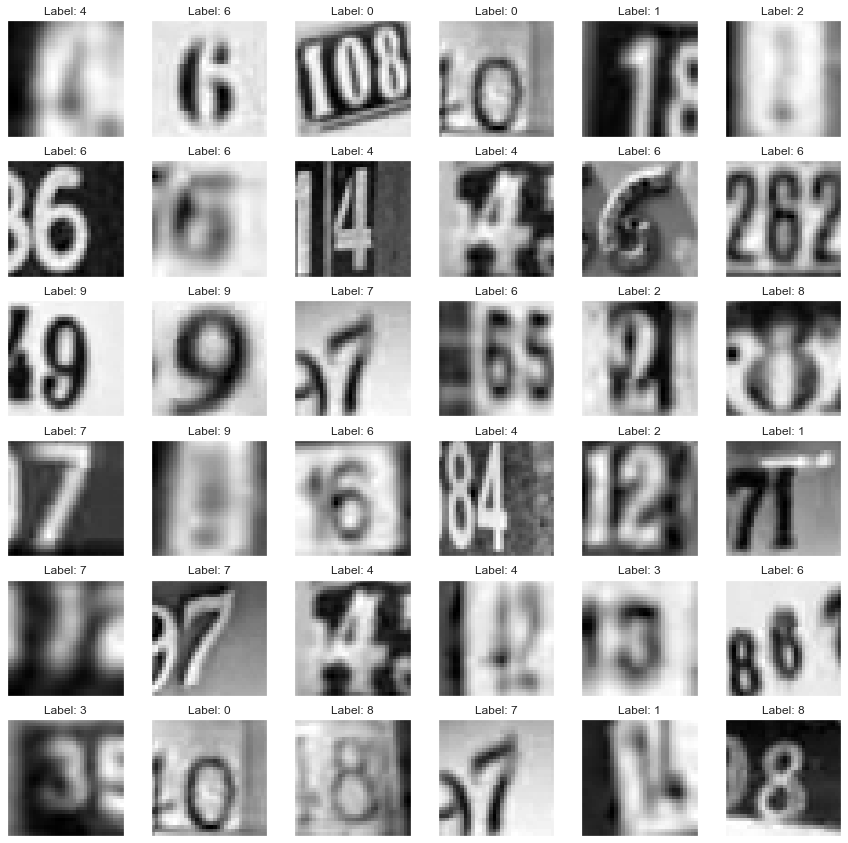

In [12]:
print('*** Train Set ***')
fig=plt.figure(figsize=(15, 15))
columns = 6
rows = 6
for i in range(1, columns*rows +1):
    rand1 = np.random.randint(99)
    img = X_train[rand1*50]
    fig.add_subplot(rows, columns, i)
    plt.imshow(img, cmap='gray')
    plt.title("Label: {}".format(y_train[rand1*50]))
    plt.xticks([])
    plt.yticks([])
plt.show()

*** Test Set ***


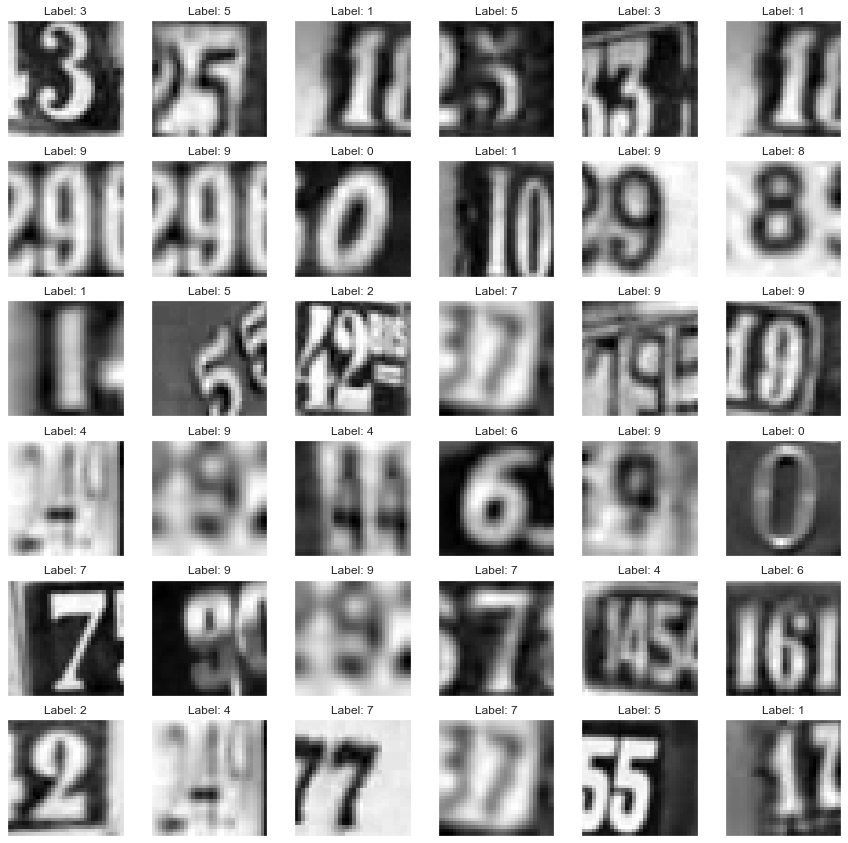

In [13]:
print('*** Test Set ***')
fig=plt.figure(figsize=(15, 15))
columns = 6
rows = 6
for i in range(1, columns*rows +1):
    rand1 = np.random.randint(99)
    img = X_test[rand1*50]
    fig.add_subplot(rows, columns, i)
    plt.imshow(img, cmap='gray')
    plt.title("Label: {}".format(y_test[rand1*50]))
    plt.xticks([])
    plt.yticks([])
plt.show()

#### Implementing Image Classifier using K-Nearest Neighbour

##### ** Importing necessary libraries **

In [14]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.metrics import classification_report

##### ** Normalize image data from 0-255 to 0-1 ** 

[[ 33.0704  30.2601  26.852  ...  71.4471  58.2204  42.9939]
 [ 25.2283  25.5533  29.9765 ... 113.0209 103.3639  84.2949]
 [ 26.2775  22.6137  40.4763 ... 113.3028 121.775  115.4228]
 ...
 [ 28.5502  36.212   45.0801 ...  24.1359  25.0927  26.0603]
 [ 38.4352  26.4733  23.2717 ...  28.1094  29.4683  30.0661]
 [ 50.2984  26.0773  24.0389 ...  49.6682  50.853   53.0377]]


Text(0.5, 1.0, 'Label: 2')

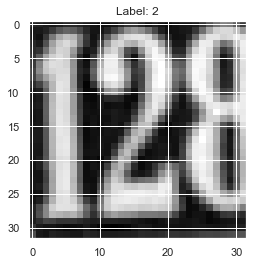

In [15]:
print(X_train[0])
plt.imshow(X_train[0], cmap='gray')
plt.title("Label: {}".format(y_train[0]))

In [16]:
X_train/=255
X_test/=255

[[0.12968785 0.11866706 0.10530196 ... 0.2801847  0.2283153  0.16860352]
 [0.09893451 0.10020902 0.1175549  ... 0.4432192  0.40534863 0.33056822]
 [0.10304902 0.08868118 0.15873058 ... 0.44432473 0.47754902 0.45263842]
 ...
 [0.11196157 0.14200786 0.17678471 ... 0.09465059 0.09840274 0.10219726]
 [0.15072627 0.10381687 0.09126157 ... 0.11023294 0.11556196 0.11790627]
 [0.19724864 0.10226392 0.0942702  ... 0.19477727 0.19942354 0.20799099]]


Text(0.5, 1.0, 'Label: 2')

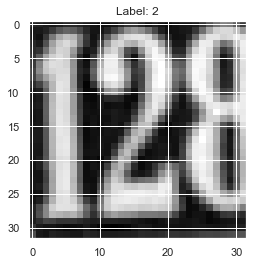

In [17]:
print(X_train[0])
plt.imshow(X_train[0], cmap='gray')
plt.title("Label: {}".format(y_train[0]))

##### ** Coverting each image into 1D in all feature sets **

In [18]:
print(X_train.shape)
print(X_test.shape)

(42000, 32, 32)
(18000, 32, 32)


In [19]:
X_train=np.asarray(X_train).reshape(42000,1024)
X_test=np.asarray(X_test).reshape(18000,1024)

In [20]:
print(X_train.shape)
print(X_test.shape)

(42000, 1024)
(18000, 1024)


##### ** Implementing KNN and evaluating performance on validation data **

In [21]:
k_val=range(1,6)
accuracies=[]
for k in k_val:
    print('*** K value is :', k)
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train[:18000], y_train[:18000])
    score=knn.score(X_train[39000:], y_train[39000:])
    print("k value=%d, accuracy score=%.2f%%" %(k, score*100))
    accuracies.append(score)
 
i=int(np.argmax(accuracies))
print("k=%d value has highest accuracy of %.2f%% on validation data" %(k_val[i],accuracies[i]*100))

*** K value is : 1
k value=1, accuracy score=40.97%
*** K value is : 2
k value=2, accuracy score=39.63%
*** K value is : 3
k value=3, accuracy score=40.70%
*** K value is : 4
k value=4, accuracy score=43.27%
*** K value is : 5
k value=5, accuracy score=43.57%
k=5 value has highest accuracy of 43.57% on validation data


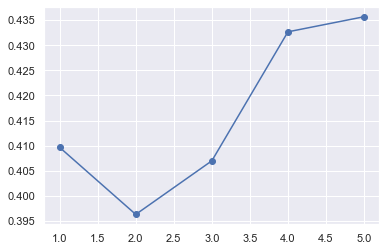

In [22]:
plt.plot(range(1,6), accuracies, 'o-')

In [23]:
k_val[i]

5

In [24]:
knn=KNeighborsClassifier(n_neighbors=k_val[i])
knn.fit(X_train, y_train)
#predictions=knn.predict(X_test)
predictions=knn.predict(X_test[:9000])

In [25]:
#print(confusion_matrix(y_test,predictions))
#print(classification_report(y_test, predictions))
print(confusion_matrix(y_test[:9000],predictions))
print(classification_report(y_test[:9000], predictions))

[[617  38  16  15  25  19  57  13  52  58]
 [ 60 625  42  44  40  16  17  31   7  12]
 [ 60 121 469  62  25  14  13  65  32  34]
 [ 84 134  87 324  18  62  20  18  49  41]
 [ 78 121  20  25 553  18  28   8  28  13]
 [108 101  44 135  23 348  62  19  59  46]
 [175  59  19  31  58  76 353   8  98  28]
 [ 64 121  64  38  10  14   9 510  14  26]
 [186  83  37  57  36  67 116   8 306  45]
 [181  68  39  62  30  48  46  32  63 342]]
              precision    recall  f1-score   support

           0       0.38      0.68      0.49       910
           1       0.42      0.70      0.53       894
           2       0.56      0.52      0.54       895
           3       0.41      0.39      0.40       837
           4       0.68      0.62      0.65       892
           5       0.51      0.37      0.43       945
           6       0.49      0.39      0.43       905
           7       0.72      0.59      0.64       870
           8       0.43      0.33      0.37       941
           9       0.53     

##### ** Observation: Performance of KNN classifier for image data is very less, accuracy is 49% and recall rate for 1 is good (around 70%), recall rate for 3, 5, 6, 8 and 9 is less than 40%.

##### ** Correct prediction with this model **

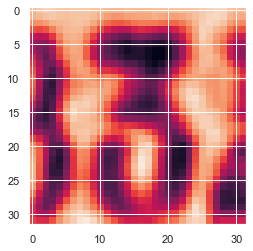

Label: [3]


In [106]:
plt.imshow(X_test[250].reshape(32,32))
plt.show()
image = X_test[250]
print("Label: {}".format(knn.predict(image.reshape(1, -1))))

##### ** Incorrect prediction with this model **

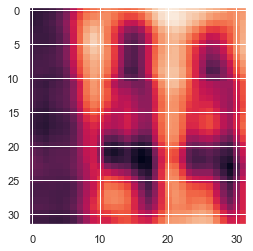

Label: [1]


In [125]:
plt.imshow(X_test[350].reshape(32,32))
plt.show()
image = X_test[350]
print("Label: {}".format(knn.predict(image.reshape(1, -1))))

### 3) Implement and apply a deep neural network classifier including (15 points)

##### ** importing necessary libraries **

In [27]:
from keras.models import Sequential
from keras.utils.np_utils import to_categorical
from keras.layers import Activation, Dense
from keras.layers import BatchNormalization, Dropout
from keras import optimizers
import tensorflow as tf

Using TensorFlow backend.


In [28]:
print(X_train.shape)
print(X_test.shape)

(42000, 1024)
(18000, 1024)


##### ** Converting train and test labels to one hot vectors **

In [29]:
print(y_test[5])

9


In [30]:
from keras.utils import np_utils

In [31]:
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [32]:
print(y_train.shape)
print(y_test.shape)

(42000, 10)
(18000, 10)


In [33]:
print(y_test[5])

[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


##### ** Building a DNN model **

In [34]:
model_1=Sequential()

# Input Layer - activation functions ReLU
model_1.add(Dense(512, kernel_initializer='he_normal',activation='relu',input_shape=(1024, ),name='Input_layer'))

#Dense Layer 1 - activation functions ReLU
model_1.add(Dense(256, kernel_initializer='he_normal',activation='relu',name='Dense_layer_1'))

#Dense Layer 2 - activation functions ReLU
model_1.add(Dense(128, kernel_initializer='he_normal',activation='relu',name='Dense_layer_2'))

#Dense Layer 3 - activation functions ReLU
model_1.add(Dense(64, kernel_initializer='he_normal',activation='relu',name='Dense_layer_3'))

#Dense Layer 4 - activation functions ReLU
model_1.add(Dense(32, kernel_initializer='he_normal',activation='relu',name='Dense_layer_4'))

# Output Layer - activation functions Softmax
model_1.add(Dense(10,activation='softmax',name='Output_layer'))

In [35]:
model_1.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Input_layer (Dense)          (None, 512)               524800    
_________________________________________________________________
Dense_layer_1 (Dense)        (None, 256)               131328    
_________________________________________________________________
Dense_layer_2 (Dense)        (None, 128)               32896     
_________________________________________________________________
Dense_layer_3 (Dense)        (None, 64)                8256      
_________________________________________________________________
Dense_layer_4 (Dense)        (None, 32)                2080      
_________________________________________________________________
Output_layer (Dense)         (None, 10)                330       
Total params: 699,690
Trainable params: 699,690
Non-trainable params: 0
________________________________________________

In [36]:
from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', min_delta=0.001, patience=5)

In [37]:
def plot_model_history(model_history):
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    # summarize history for accuracy
    axs[0].plot(range(1,len(model_history.history['accuracy'])+1),model_history.history['accuracy'])
    axs[0].plot(range(1,len(model_history.history['val_accuracy'])+1),model_history.history['val_accuracy'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model_history.history['accuracy'])+1),len(model_history.history['accuracy'])/10)
    axs[0].legend(['train', 'validation'], loc='best')
    # summarize history for loss
    axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    axs[1].plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)
    axs[1].legend(['train', 'validation'], loc='best')
    plt.show()

### ** Using sgd optimizer and Categorical Crossentropy as loss function and Accuracy as the metric **

In [38]:
model_1.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

In [39]:
history=model_1.fit(X_train, y_train, validation_split=0.2, shuffle=True, batch_size=200, epochs=20, callbacks=[early_stopping], verbose=1)

Train on 33600 samples, validate on 8400 samples
Epoch 1/20
33600/33600 [==============================] - 3s 80us/step - loss: 2.2931 - accuracy: 0.1225 - val_loss: 2.2727 - val_accuracy: 0.1450
Epoch 2/20
33600/33600 [==============================] - 2s 71us/step - loss: 2.2568 - accuracy: 0.1644 - val_loss: 2.2379 - val_accuracy: 0.1938
Epoch 3/20
33600/33600 [==============================] - 2s 67us/step - loss: 2.2153 - accuracy: 0.2096 - val_loss: 2.1830 - val_accuracy: 0.2377
Epoch 4/20
33600/33600 [==============================] - 2s 68us/step - loss: 2.1552 - accuracy: 0.2454 - val_loss: 2.1048 - val_accuracy: 0.3140
Epoch 5/20
33600/33600 [==============================] - 2s 66us/step - loss: 2.0834 - accuracy: 0.2770 - val_loss: 2.0378 - val_accuracy: 0.3187
Epoch 6/20
33600/33600 [==============================] - 2s 66us/step - loss: 1.9873 - accuracy: 0.3229 - val_loss: 1.9573 - val_accuracy: 0.3143
Epoch 7/20
33600/33600 [==============================] - 2s 65us/ste

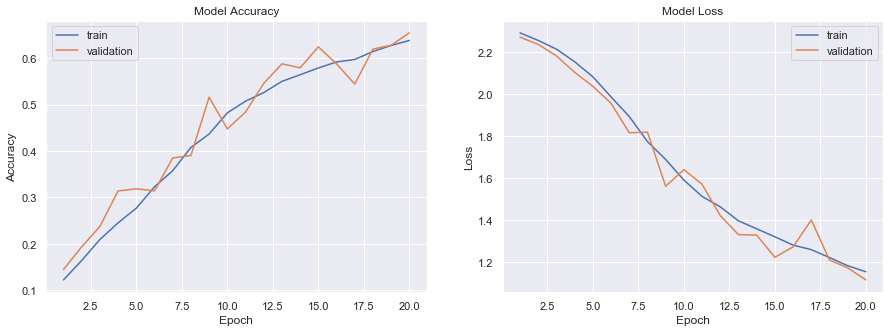

In [40]:
plot_model_history(history)

In [41]:
train_score = model_1.evaluate(X_train, y_train)
print('Train loss:', train_score[0])
print('Train accuracy:', train_score[1])

42000/42000 [==============================] - 3s 60us/step
Train loss: 1.0919812278066363
Train accuracy: 0.6621666550636292


In [42]:
test_score = model_1.evaluate(X_test, y_test)
print('Test loss:', test_score[0])
print('Test accuracy:', test_score[1])

18000/18000 [==============================] - 1s 69us/step
Test loss: 1.1055842538409764
Test accuracy: 0.6591110825538635


In [43]:
results=pd.DataFrame({'Model':['Model_1'], 'Hyper_Param':['SGD only'], 'Train_Loss': train_score[0], 'Train_Acc': train_score[1], 'Test_Loss': test_score[0], 'Test_Acc': test_score[1]},index={'1'})
results

,Model,Hyper_Param,Train_Loss,Train_Acc,Test_Loss,Test_Acc
1,Model_1,SGD only,1.091981,0.662167,1.105584,0.659111


### ** Observation:
##### Model only with SGD optimizer performance consistent in Train and Test; but performance across Test is not consistent, we can see spikes in accuracy and loss.
##### Accuracy of the model is low, but better compare to base KNN classification.

### ** Using adam optimizer and Categorical Crossentropy as loss function and Accuracy as the metric **

In [44]:
model_1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [45]:
history=model_1.fit(X_train, y_train, validation_split=0.2, shuffle=True, batch_size=200, epochs=20, callbacks=[early_stopping], verbose=1)

Train on 33600 samples, validate on 8400 samples
Epoch 1/20
33600/33600 [==============================] - 4s 109us/step - loss: 1.6062 - accuracy: 0.4782 - val_loss: 1.3095 - val_accuracy: 0.5799
Epoch 2/20
33600/33600 [==============================] - 3s 92us/step - loss: 1.2322 - accuracy: 0.6074 - val_loss: 1.1071 - val_accuracy: 0.6523
Epoch 3/20
33600/33600 [==============================] - 3s 89us/step - loss: 1.1182 - accuracy: 0.6453 - val_loss: 1.0578 - val_accuracy: 0.6689
Epoch 4/20
33600/33600 [==============================] - 3s 91us/step - loss: 1.0561 - accuracy: 0.6667 - val_loss: 1.1047 - val_accuracy: 0.6543
Epoch 5/20
33600/33600 [==============================] - 3s 99us/step - loss: 0.9878 - accuracy: 0.6904 - val_loss: 0.9826 - val_accuracy: 0.6986
Epoch 6/20
33600/33600 [==============================] - 3s 89us/step - loss: 0.9444 - accuracy: 0.7040 - val_loss: 0.9393 - val_accuracy: 0.7067
Epoch 7/20
33600/33600 [==============================] - 3s 89us/st

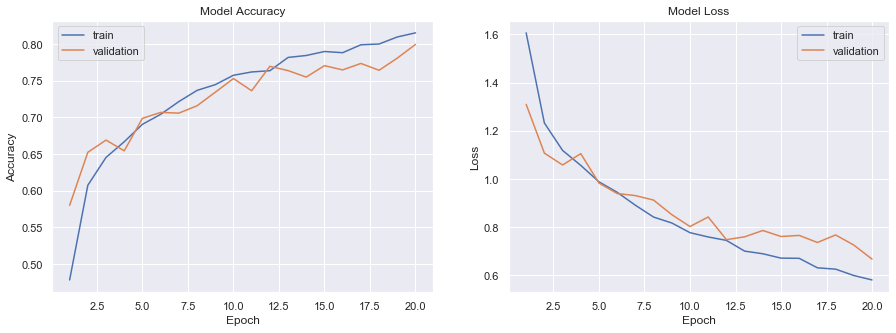

In [46]:
plot_model_history(history)

In [47]:
train_score = model_1.evaluate(X_train, y_train)
print('Train loss:', train_score[0])
print('Train accuracy:', train_score[1])

42000/42000 [==============================] - 3s 61us/step
Train loss: 0.5487720892997016
Train accuracy: 0.8275952339172363


In [48]:
test_score = model_1.evaluate(X_test, y_test)
print('Test loss:', test_score[0])
print('Test accuracy:', test_score[1])

18000/18000 [==============================] - 1s 63us/step
Test loss: 0.6845440433820089
Test accuracy: 0.7960000038146973


In [49]:
results_new=pd.DataFrame({'Model':['Model_1'], 'Hyper_Param':['Adam only'], 'Train_Loss': train_score[0], 'Train_Acc': train_score[1], 'Test_Loss': test_score[0], 'Test_Acc': test_score[1]},index={'2'})
results=pd.concat([results, results_new])
results

,Model,Hyper_Param,Train_Loss,Train_Acc,Test_Loss,Test_Acc
1,Model_1,SGD only,1.091981,0.662167,1.105584,0.659111
2,Model_1,Adam only,0.548772,0.827595,0.684544,0.796000


### ** Observation:
##### Model only with Adam optimizer performance consistent in Train and Test; but performance across Test is not consistent, we can see spikes in accuracy and loss.
##### Accuracy and Loss of the model is better compare to base KNN and NN_SGD classifications.

### ** Including learning rate in SGD optimizer **

In [50]:
sgd=optimizers.sgd(lr = 0.0001)
model_1.compile(optimizer=sgd, loss='categorical_crossentropy', metrics=['accuracy'])

In [51]:
history=model_1.fit(X_train, y_train, validation_split=0.2, shuffle=True, batch_size=200, epochs=100, callbacks=[early_stopping], verbose=1)

Train on 33600 samples, validate on 8400 samples
Epoch 1/100
33600/33600 [==============================] - 2s 73us/step - loss: 0.5022 - accuracy: 0.8405 - val_loss: 0.6378 - val_accuracy: 0.8079
Epoch 2/100
33600/33600 [==============================] - 2s 65us/step - loss: 0.4858 - accuracy: 0.8466 - val_loss: 0.6285 - val_accuracy: 0.8115
Epoch 3/100
33600/33600 [==============================] - 2s 65us/step - loss: 0.4785 - accuracy: 0.8502 - val_loss: 0.6237 - val_accuracy: 0.8124
Epoch 4/100
33600/33600 [==============================] - 2s 67us/step - loss: 0.4739 - accuracy: 0.8520 - val_loss: 0.6208 - val_accuracy: 0.8126
Epoch 5/100
33600/33600 [==============================] - 2s 71us/step - loss: 0.4707 - accuracy: 0.8529 - val_loss: 0.6187 - val_accuracy: 0.8139
Epoch 6/100
33600/33600 [==============================] - 2s 69us/step - loss: 0.4681 - accuracy: 0.8545 - val_loss: 0.6172 - val_accuracy: 0.8140
Epoch 7/100
33600/33600 [==============================] - 2s 6

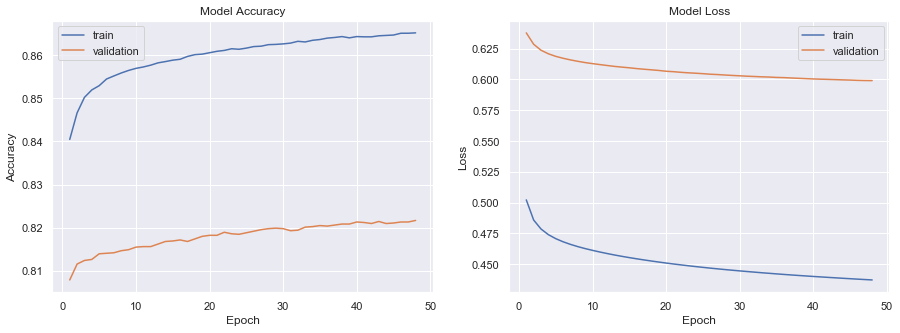

In [52]:
plot_model_history(history)

In [53]:
train_score = model_1.evaluate(X_train, y_train)
print('Train loss:', train_score[0])
print('Train accuracy:', train_score[1])

42000/42000 [==============================] - 2s 59us/step
Train loss: 0.4692518322297505
Train accuracy: 0.8566666841506958


In [54]:
test_score = model_1.evaluate(X_test, y_test)
print('Test loss:', test_score[0])
print('Test accuracy:', test_score[1])

18000/18000 [==============================] - 1s 61us/step
Test loss: 0.621222088681327
Test accuracy: 0.8151111006736755


In [55]:
results_new=pd.DataFrame({'Model':['Model_1'], 'Hyper_Param':['SGD with LR'], 'Train_Loss': train_score[0], 'Train_Acc': train_score[1], 'Test_Loss': test_score[0], 'Test_Acc': test_score[1]},index={'3'})
results=pd.concat([results, results_new])
results

,Model,Hyper_Param,Train_Loss,Train_Acc,Test_Loss,Test_Acc
1,Model_1,SGD only,1.091981,0.662167,1.105584,0.659111
2,Model_1,Adam only,0.548772,0.827595,0.684544,0.796000
3,Model_1,SGD with LR,0.469252,0.856667,0.621222,0.815111


### ** Observation:
##### Model with SGD optimizer and learning rate 0.0001, performance consistent in Train and Test.
##### Accuracy and Loss of the model is better compare to other classification models.

### ** Including learning rate in ADAM optimizer **

In [56]:
adam = optimizers.adam(lr=0.0001)
model_1.compile(optimizer=adam, loss='categorical_crossentropy', metrics=['accuracy'])

In [57]:
history=model_1.fit(X_train, y_train, validation_split=0.2, shuffle=True, batch_size=200, epochs=100, callbacks=[early_stopping], verbose=1)

Train on 33600 samples, validate on 8400 samples
Epoch 1/100
33600/33600 [==============================] - 3s 93us/step - loss: 0.4449 - accuracy: 0.8634 - val_loss: 0.6040 - val_accuracy: 0.8188
Epoch 2/100
33600/33600 [==============================] - 3s 83us/step - loss: 0.4347 - accuracy: 0.8641 - val_loss: 0.5978 - val_accuracy: 0.8202
Epoch 3/100
33600/33600 [==============================] - 3s 89us/step - loss: 0.4252 - accuracy: 0.8680 - val_loss: 0.6012 - val_accuracy: 0.8212
Epoch 4/100
33600/33600 [==============================] - 3s 84us/step - loss: 0.4188 - accuracy: 0.8690 - val_loss: 0.6047 - val_accuracy: 0.8199
Epoch 5/100
33600/33600 [==============================] - 3s 84us/step - loss: 0.4106 - accuracy: 0.8721 - val_loss: 0.5933 - val_accuracy: 0.8233
Epoch 6/100
33600/33600 [==============================] - 3s 82us/step - loss: 0.4071 - accuracy: 0.8735 - val_loss: 0.5952 - val_accuracy: 0.8240
Epoch 7/100
33600/33600 [==============================] - 3s 8

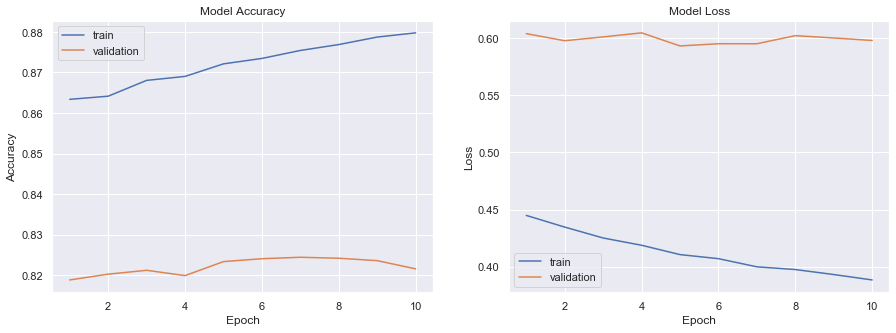

In [58]:
plot_model_history(history)

In [59]:
train_score = model_1.evaluate(X_train, y_train)
print('Train loss:', train_score[0])
print('Train accuracy:', train_score[1])

42000/42000 [==============================] - 2s 57us/step
Train loss: 0.42127040119398207
Train accuracy: 0.8711666464805603


In [60]:
test_score = model_1.evaluate(X_test, y_test)
print('Test loss:', test_score[0])
print('Test accuracy:', test_score[1])

18000/18000 [==============================] - 1s 60us/step
Test loss: 0.6169264487690396
Test accuracy: 0.8211110830307007


In [61]:
results_new=pd.DataFrame({'Model':['Model_1'], 'Hyper_Param':['Adam with LR'], 'Train_Loss': train_score[0], 'Train_Acc': train_score[1], 'Test_Loss': test_score[0], 'Test_Acc': test_score[1]},index={'4'})
results=pd.concat([results, results_new])
results

,Model,Hyper_Param,Train_Loss,Train_Acc,Test_Loss,Test_Acc
1,Model_1,SGD only,1.091981,0.662167,1.105584,0.659111
2,Model_1,Adam only,0.548772,0.827595,0.684544,0.796000
3,Model_1,SGD with LR,0.469252,0.856667,0.621222,0.815111
4,Model_1,Adam with LR,0.421270,0.871167,0.616926,0.821111


### ** Observation:
##### Model with Adam optimizer and learning rate 0.0001, performance consistent in Train and Test.
##### Accuracy and Loss of the model is slightly better compare to SGD with learning rate.

### 4) Implement batch normalization for training the neural network (5 points)

In [62]:
model_2=Sequential() 

# Input Layer - activation functions ReLU
model_2.add(Dense(512, kernel_initializer='he_normal',activation='relu',input_shape=(1024, ),name='Input_layer'))

#BatchNormalization Layer 1
model_2.add(BatchNormalization(name='Batch_layer_1'))

#Dense Layer 1 - activation functions ReLU
model_2.add(Dense(256, kernel_initializer='he_normal',activation='relu',name='Dense_layer_1'))

#BatchNormalization Layer 2
model_2.add(BatchNormalization(name='Batch_layer_2'))

#Dense Layer 2 - activation functions ReLU
model_2.add(Dense(128, kernel_initializer='he_normal',activation='relu',name='Dense_layer_2'))

#BatchNormalization Layer 3
model_2.add(BatchNormalization(name='Batch_layer_3'))

#Dense Layer 3 - activation functions ReLU
model_2.add(Dense(64, kernel_initializer='he_normal',activation='relu',name='Dense_layer_3'))

#BatchNormalization Layer 4
model_2.add(BatchNormalization(name='Batch_layer_4'))

#Dense Layer 4 - activation functions ReLU
model_2.add(Dense(32, kernel_initializer='he_normal',activation='relu',name='Dense_layer_4'))

#BatchNormalization Layer 5
model_2.add(BatchNormalization(name='Batch_layer_5'))

# Output Layer - activation functions Softmax
model_2.add(Dense(10,activation='softmax',name='Output_layer'))

In [63]:
model_2.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Input_layer (Dense)          (None, 512)               524800    
_________________________________________________________________
Batch_layer_1 (BatchNormaliz (None, 512)               2048      
_________________________________________________________________
Dense_layer_1 (Dense)        (None, 256)               131328    
_________________________________________________________________
Batch_layer_2 (BatchNormaliz (None, 256)               1024      
_________________________________________________________________
Dense_layer_2 (Dense)        (None, 128)               32896     
_________________________________________________________________
Batch_layer_3 (BatchNormaliz (None, 128)               512       
_________________________________________________________________
Dense_layer_3 (Dense)        (None, 64)               

### ** Using SGD optimizer and Batch Normalization**

In [64]:
model_2.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

In [65]:
history=model_2.fit(X_train, y_train, validation_split=0.2, shuffle=True, batch_size=200, epochs=100, callbacks=[early_stopping], verbose=1)

Train on 33600 samples, validate on 8400 samples
Epoch 1/100
33600/33600 [==============================] - 5s 161us/step - loss: 2.2260 - accuracy: 0.2399 - val_loss: 2.1637 - val_accuracy: 0.2360
Epoch 2/100
33600/33600 [==============================] - 3s 104us/step - loss: 1.6316 - accuracy: 0.4605 - val_loss: 1.6478 - val_accuracy: 0.4681
Epoch 3/100
33600/33600 [==============================] - 3s 103us/step - loss: 1.3470 - accuracy: 0.5750 - val_loss: 1.3607 - val_accuracy: 0.5707
Epoch 4/100
33600/33600 [==============================] - 3s 103us/step - loss: 1.1759 - accuracy: 0.6360 - val_loss: 1.2226 - val_accuracy: 0.6177
Epoch 5/100
33600/33600 [==============================] - 4s 113us/step - loss: 1.0679 - accuracy: 0.6713 - val_loss: 1.2003 - val_accuracy: 0.6282
Epoch 6/100
33600/33600 [==============================] - 4s 107us/step - loss: 0.9903 - accuracy: 0.6947 - val_loss: 1.1307 - val_accuracy: 0.6467
Epoch 7/100
33600/33600 [==============================] 

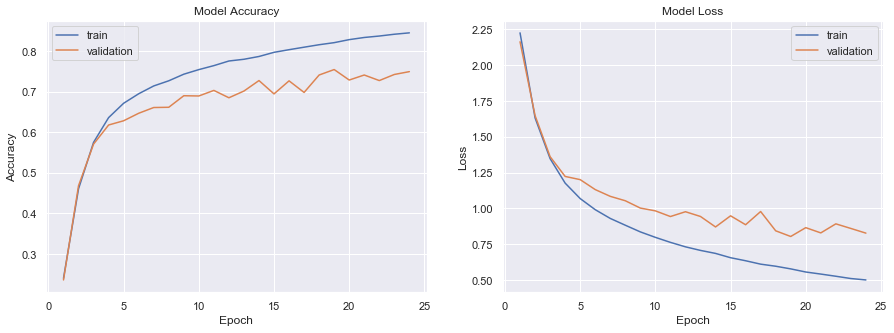

In [66]:
plot_model_history(history)

In [67]:
train_score = model_2.evaluate(X_train, y_train)
print('Train loss:', train_score[0])
print('Train accuracy:', train_score[1])

42000/42000 [==============================] - 3s 83us/step
Train loss: 0.6476168142840976
Train accuracy: 0.7978571653366089


In [68]:
test_score = model_2.evaluate(X_test, y_test)
print('Test loss:', test_score[0])
print('Test accuracy:', test_score[1])

18000/18000 [==============================] - 2s 89us/step
Test loss: 0.8323648065461052
Test accuracy: 0.7411666512489319


In [69]:
results_new=pd.DataFrame({'Model':['Model_2'], 'Hyper_Param':['SGD only'], 'Train_Loss': train_score[0], 'Train_Acc': train_score[1], 'Test_Loss': test_score[0], 'Test_Acc': test_score[1]},index={'5'})
results=pd.concat([results, results_new])
results

,Model,Hyper_Param,Train_Loss,Train_Acc,Test_Loss,Test_Acc
1,Model_1,SGD only,1.091981,0.662167,1.105584,0.659111
2,Model_1,Adam only,0.548772,0.827595,0.684544,0.796000
3,Model_1,SGD with LR,0.469252,0.856667,0.621222,0.815111
4,Model_1,Adam with LR,0.421270,0.871167,0.616926,0.821111
5,Model_2,SGD only,0.647617,0.797857,0.832365,0.741167


### ** Observation:
##### Model with batch normalization and  SGD optimizer (no learning rate) performance is consistent in Train but not in Test.
##### Train and test accuracy has increased and Loss reduced significantly when compared with model without batch normalization (compare #5 with #1 in above) . But not good when compared with model without batch normalization and optimizer with learning rate (#5 with #3 and #4 in above) 

### ** Using Adam optimizer and Batch Normalization **

In [70]:
model_2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [71]:
history=model_2.fit(X_train, y_train, validation_split=0.2, shuffle=True, batch_size=200, epochs=100, callbacks=[early_stopping], verbose=1)

Train on 33600 samples, validate on 8400 samples
Epoch 1/100
33600/33600 [==============================] - 6s 186us/step - loss: 0.9873 - accuracy: 0.6868 - val_loss: 2.7575 - val_accuracy: 0.2686
Epoch 2/100
33600/33600 [==============================] - 4s 121us/step - loss: 0.8217 - accuracy: 0.7413 - val_loss: 1.7012 - val_accuracy: 0.4443
Epoch 3/100
33600/33600 [==============================] - 4s 133us/step - loss: 0.7559 - accuracy: 0.7611 - val_loss: 2.7300 - val_accuracy: 0.3125
Epoch 4/100
33600/33600 [==============================] - 4s 124us/step - loss: 0.6984 - accuracy: 0.7813 - val_loss: 2.8296 - val_accuracy: 0.2627
Epoch 5/100
33600/33600 [==============================] - 4s 121us/step - loss: 0.6753 - accuracy: 0.7869 - val_loss: 2.4268 - val_accuracy: 0.3051
Epoch 6/100
33600/33600 [==============================] - 4s 124us/step - loss: 0.6124 - accuracy: 0.8090 - val_loss: 1.9187 - val_accuracy: 0.4352
Epoch 7/100
33600/33600 [==============================] 

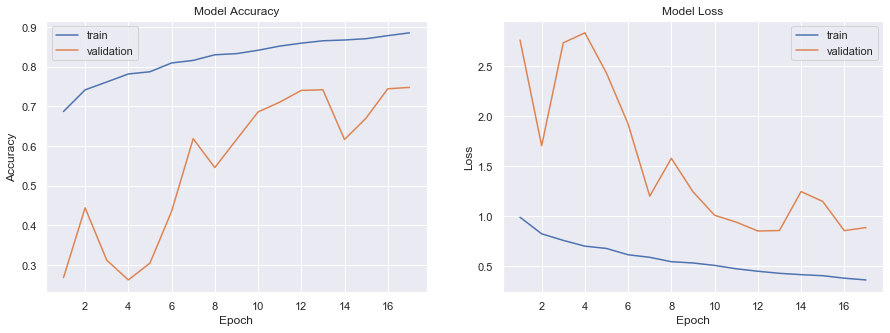

In [72]:
plot_model_history(history)

In [73]:
train_score = model_2.evaluate(X_train, y_train)
print('Train loss:', train_score[0])
print('Train accuracy:', train_score[1])

42000/42000 [==============================] - 4s 102us/step
Train loss: 0.7201083704744067
Train accuracy: 0.7814761996269226


In [74]:
test_score = model_2.evaluate(X_test, y_test)
print('Test loss:', test_score[0])
print('Test accuracy:', test_score[1])

18000/18000 [==============================] - 2s 98us/step
Test loss: 0.9047309738794963
Test accuracy: 0.738444447517395


In [75]:
results_new=pd.DataFrame({'Model':['Model_2'], 'Hyper_Param':['Adam only'], 'Train_Loss': train_score[0], 'Train_Acc': train_score[1], 'Test_Loss': test_score[0], 'Test_Acc': test_score[1]},index={'6'})
results=pd.concat([results, results_new])
results

,Model,Hyper_Param,Train_Loss,Train_Acc,Test_Loss,Test_Acc
1,Model_1,SGD only,1.091981,0.662167,1.105584,0.659111
2,Model_1,Adam only,0.548772,0.827595,0.684544,0.796000
3,Model_1,SGD with LR,0.469252,0.856667,0.621222,0.815111
4,Model_1,Adam with LR,0.421270,0.871167,0.616926,0.821111
5,Model_2,SGD only,0.647617,0.797857,0.832365,0.741167
6,Model_2,Adam only,0.720108,0.781476,0.904731,0.738444


### ** Observation:
##### Model with batch normalization and  Adam optimizer (no learning rate) performance is consistent in Train but not in Test.
##### Performance is not good when compared with model without batch normalization (compare #6 with #2 in above) . Train and Test accuracy has reduced and Loss has increased.

### ** SGD optimizer with learning rate and Batch Normalization ** 

In [76]:
model_2.compile(optimizer=sgd, loss='categorical_crossentropy', metrics=['accuracy'])

In [77]:
history=model_2.fit(X_train, y_train, validation_split=0.2, shuffle=True, batch_size=200, epochs=100, callbacks=[early_stopping], verbose=1)

Train on 33600 samples, validate on 8400 samples
Epoch 1/100
33600/33600 [==============================] - 6s 176us/step - loss: 0.3316 - accuracy: 0.8945 - val_loss: 0.5660 - val_accuracy: 0.8352
Epoch 2/100
33600/33600 [==============================] - 4s 108us/step - loss: 0.3229 - accuracy: 0.8991 - val_loss: 0.5530 - val_accuracy: 0.8390
Epoch 3/100
33600/33600 [==============================] - 4s 106us/step - loss: 0.3202 - accuracy: 0.9001 - val_loss: 0.5498 - val_accuracy: 0.8402
Epoch 4/100
33600/33600 [==============================] - 4s 108us/step - loss: 0.3165 - accuracy: 0.9001 - val_loss: 0.5472 - val_accuracy: 0.8418
Epoch 5/100
33600/33600 [==============================] - 4s 115us/step - loss: 0.3159 - accuracy: 0.8985 - val_loss: 0.5448 - val_accuracy: 0.8419
Epoch 6/100
33600/33600 [==============================] - 4s 111us/step - loss: 0.3096 - accuracy: 0.9029 - val_loss: 0.5424 - val_accuracy: 0.8424
Epoch 7/100
33600/33600 [==============================] 

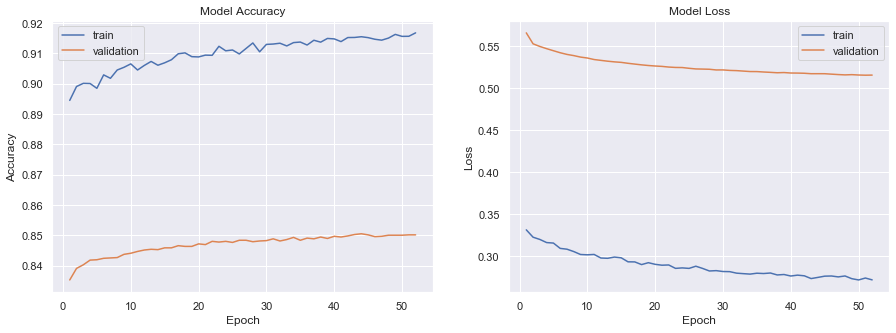

In [78]:
plot_model_history(history)

In [79]:
train_score = model_2.evaluate(X_train, y_train)
print('Train loss:', train_score[0])
print('Train accuracy:', train_score[1])

42000/42000 [==============================] - 5s 109us/step
Train loss: 0.28976766466739634
Train accuracy: 0.9156190752983093


In [80]:
test_score = model_2.evaluate(X_test, y_test)
print('Test loss:', test_score[0])
print('Test accuracy:', test_score[1])

18000/18000 [==============================] - 2s 126us/step
Test loss: 0.5173003519243664
Test accuracy: 0.8485555648803711


In [81]:
results_new=pd.DataFrame({'Model':['Model_2'], 'Hyper_Param':['SGD with LR'], 'Train_Loss': train_score[0], 'Train_Acc': train_score[1], 'Test_Loss': test_score[0], 'Test_Acc': test_score[1]},index={'7'})
results=pd.concat([results, results_new])
results

,Model,Hyper_Param,Train_Loss,Train_Acc,Test_Loss,Test_Acc
1,Model_1,SGD only,1.091981,0.662167,1.105584,0.659111
2,Model_1,Adam only,0.548772,0.827595,0.684544,0.796000
3,Model_1,SGD with LR,0.469252,0.856667,0.621222,0.815111
4,Model_1,Adam with LR,0.421270,0.871167,0.616926,0.821111
5,Model_2,SGD only,0.647617,0.797857,0.832365,0.741167
6,Model_2,Adam only,0.720108,0.781476,0.904731,0.738444
7,Model_2,SGD with LR,0.289768,0.915619,0.517300,0.848556


### ** Observation:
##### Model with batch normalization and  SGD optimizer with Learning Rate 0.0001 performance is consistent in Train and Test.
##### Performance is significantly good when compared with model without batch normalization (compare #7 with #3 in above) . Train and Test accuracy has improved and Loss has reduced.

### ** Adam optimizer with learning rate and Batch Normalization ** 

In [82]:
model_2.compile(optimizer=adam, loss='categorical_crossentropy', metrics=['accuracy'])

In [83]:
history=model_2.fit(X_train, y_train, validation_split=0.2, shuffle=True, batch_size=200, epochs=100, callbacks=[early_stopping], verbose=1)

Train on 33600 samples, validate on 8400 samples
Epoch 1/100
33600/33600 [==============================] - 7s 213us/step - loss: 0.2882 - accuracy: 0.9080 - val_loss: 0.5598 - val_accuracy: 0.8357
Epoch 2/100
33600/33600 [==============================] - 4s 129us/step - loss: 0.2546 - accuracy: 0.9208 - val_loss: 0.5458 - val_accuracy: 0.8418
Epoch 3/100
33600/33600 [==============================] - 4s 133us/step - loss: 0.2379 - accuracy: 0.9272 - val_loss: 0.5695 - val_accuracy: 0.8357
Epoch 4/100
33600/33600 [==============================] - 5s 144us/step - loss: 0.2308 - accuracy: 0.9287 - val_loss: 0.5501 - val_accuracy: 0.8427
Epoch 5/100
33600/33600 [==============================] - 5s 140us/step - loss: 0.2222 - accuracy: 0.9321 - val_loss: 0.5491 - val_accuracy: 0.8460
Epoch 6/100
33600/33600 [==============================] - 4s 133us/step - loss: 0.2190 - accuracy: 0.9338 - val_loss: 0.5503 - val_accuracy: 0.8458
Epoch 7/100
33600/33600 [==============================] 

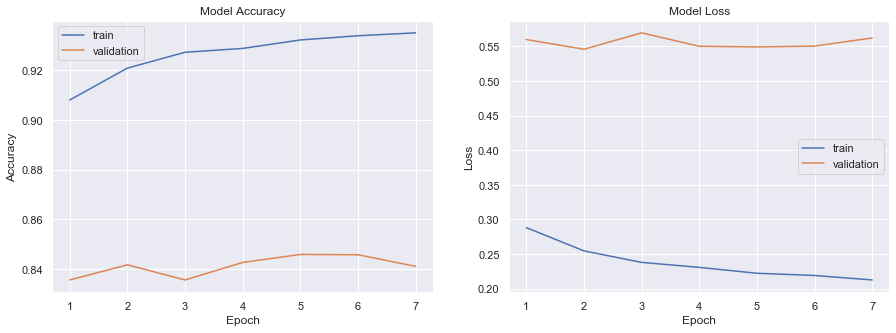

In [84]:
plot_model_history(history)

In [85]:
train_score = model_2.evaluate(X_train, y_train)
print('Train loss:', train_score[0])
print('Train accuracy:', train_score[1])

42000/42000 [==============================] - 5s 113us/step
Train loss: 0.2805831832928317
Train accuracy: 0.9182857275009155


In [86]:
test_score = model_2.evaluate(X_test, y_test)
print('Test loss:', test_score[0])
print('Test accuracy:', test_score[1])

18000/18000 [==============================] - 2s 112us/step
Test loss: 0.5669238226016362
Test accuracy: 0.839555561542511


In [87]:
results_new=pd.DataFrame({'Model':['Model_2'], 'Hyper_Param':['Adam with LR'], 'Train_Loss': train_score[0], 'Train_Acc': train_score[1], 'Test_Loss': test_score[0], 'Test_Acc': test_score[1]},index={'8'})
results=pd.concat([results, results_new])
results

,Model,Hyper_Param,Train_Loss,Train_Acc,Test_Loss,Test_Acc
1,Model_1,SGD only,1.091981,0.662167,1.105584,0.659111
2,Model_1,Adam only,0.548772,0.827595,0.684544,0.796000
3,Model_1,SGD with LR,0.469252,0.856667,0.621222,0.815111
4,Model_1,Adam with LR,0.421270,0.871167,0.616926,0.821111
5,Model_2,SGD only,0.647617,0.797857,0.832365,0.741167
6,Model_2,Adam only,0.720108,0.781476,0.904731,0.738444
7,Model_2,SGD with LR,0.289768,0.915619,0.517300,0.848556
8,Model_2,Adam with LR,0.280583,0.918286,0.566924,0.839556


### ** Observation:
##### Model with batch normalization and  Adam optimizer with Learning Rate 0.0001 performance is consistent in Train and Test.
##### Performance is significantly good when compared with model without batch normalization (compare #8 with #4 in above) . Train and Test accuracy has improved and Loss has reduced.

### ** Adding Dropout and  batch normalization **

In [88]:
model_3=Sequential()

# Input Layer - activation functions ReLU
model_3.add(Dense(512, kernel_initializer='he_normal',activation='relu',input_shape=(1024, ),name='Input_layer'))

#BatchNormalization Layer 1
model_3.add(BatchNormalization(name='Batch_layer_1'))

#Dropout Layer 1
model_3.add(Dropout(0.2,name='Dropout_1'))

#Dense Layer 1 - activation functions ReLU
model_3.add(Dense(256, kernel_initializer='he_normal',activation='relu',name='Dense_layer_1'))

#BatchNormalization Layer 2
model_3.add(BatchNormalization(name='Batch_layer_2'))

#Dropout Layer 2
model_3.add(Dropout(0.2,name='Dropout_2'))

#Dense Layer 2 - activation functions ReLU
model_3.add(Dense(128, kernel_initializer='he_normal',activation='relu',name='Dense_layer_2'))

#BatchNormalization Layer 3
model_3.add(BatchNormalization(name='Batch_layer_3'))

#Dropout Layer 3
model_3.add(Dropout(0.2,name='Dropout_3'))

#Dense Layer 3 - activation functions ReLU
model_3.add(Dense(64, kernel_initializer='he_normal',activation='relu',name='Dense_layer_3'))

#BatchNormalization Layer 4
model_3.add(BatchNormalization(name='Batch_layer_4'))

#Dropout Layer 4
model_3.add(Dropout(0.2,name='Dropout_4'))

#Dense Layer 4 - activation functions ReLU
model_3.add(Dense(32, kernel_initializer='he_normal',activation='relu',name='Dense_layer_4'))

#BatchNormalization Layer 5
model_3.add(BatchNormalization(name='Batch_layer_5'))

#Dropout Layer 5
model_3.add(Dropout(0.2,name='Dropout_5'))

# Output Layer - activation functions Softmax
model_3.add(Dense(10,activation='softmax',name='Output_layer'))

In [89]:
model_3.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Input_layer (Dense)          (None, 512)               524800    
_________________________________________________________________
Batch_layer_1 (BatchNormaliz (None, 512)               2048      
_________________________________________________________________
Dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
Dense_layer_1 (Dense)        (None, 256)               131328    
_________________________________________________________________
Batch_layer_2 (BatchNormaliz (None, 256)               1024      
_________________________________________________________________
Dropout_2 (Dropout)          (None, 256)               0         
_________________________________________________________________
Dense_layer_2 (Dense)        (None, 128)              

### ** Using SGD optimizer with learning rate 0.0001 **

In [90]:
model_3.compile(optimizer=sgd, loss='categorical_crossentropy', metrics=['accuracy'])

In [91]:
history=model_3.fit(X_train, y_train, validation_split=0.2, shuffle=True, batch_size=200, epochs=100, callbacks=[early_stopping], verbose=1)

Train on 33600 samples, validate on 8400 samples
Epoch 1/100
33600/33600 [==============================] - 7s 202us/step - loss: 2.9881 - accuracy: 0.1035 - val_loss: 2.4157 - val_accuracy: 0.1008
Epoch 2/100
33600/33600 [==============================] - 5s 143us/step - loss: 2.9793 - accuracy: 0.1021 - val_loss: 2.4852 - val_accuracy: 0.0976
Epoch 3/100
33600/33600 [==============================] - 5s 145us/step - loss: 2.9578 - accuracy: 0.1042 - val_loss: 2.5078 - val_accuracy: 0.1038
Epoch 4/100
33600/33600 [==============================] - 5s 140us/step - loss: 2.9543 - accuracy: 0.1039 - val_loss: 2.5141 - val_accuracy: 0.1089
Epoch 5/100
33600/33600 [==============================] - 5s 140us/step - loss: 2.9288 - accuracy: 0.1065 - val_loss: 2.5125 - val_accuracy: 0.1126
Epoch 6/100
33600/33600 [==============================] - 5s 148us/step - loss: 2.9313 - accuracy: 0.1068 - val_loss: 2.5060 - val_accuracy: 0.1146


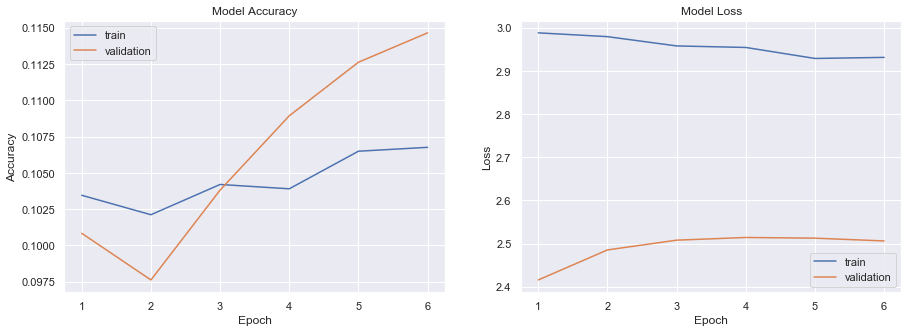

In [92]:
plot_model_history(history)

In [93]:
train_score = model_3.evaluate(X_train, y_train)
print('Train loss:', train_score[0])
print('Train accuracy:', train_score[1])

42000/42000 [==============================] - 5s 118us/step
Train loss: 2.5131662272498723
Train accuracy: 0.11133333295583725


In [94]:
test_score = model_3.evaluate(X_test, y_test)
print('Test loss:', test_score[0])
print('Test accuracy:', test_score[1])

18000/18000 [==============================] - 2s 119us/step
Test loss: 2.5085932023790147
Test accuracy: 0.11055555194616318


In [95]:
results_new=pd.DataFrame({'Model':['Model_3'], 'Hyper_Param':['SGD with LR'], 'Train_Loss': train_score[0], 'Train_Acc': train_score[1], 'Test_Loss': test_score[0], 'Test_Acc': test_score[1]},index={'9'})
results=pd.concat([results, results_new])
results

,Model,Hyper_Param,Train_Loss,Train_Acc,Test_Loss,Test_Acc
1,Model_1,SGD only,1.091981,0.662167,1.105584,0.659111
2,Model_1,Adam only,0.548772,0.827595,0.684544,0.796000
3,Model_1,SGD with LR,0.469252,0.856667,0.621222,0.815111
4,Model_1,Adam with LR,0.421270,0.871167,0.616926,0.821111
5,Model_2,SGD only,0.647617,0.797857,0.832365,0.741167
6,Model_2,Adam only,0.720108,0.781476,0.904731,0.738444
7,Model_2,SGD with LR,0.289768,0.915619,0.517300,0.848556
8,Model_2,Adam with LR,0.280583,0.918286,0.566924,0.839556
9,Model_3,SGD with LR,2.513166,0.111333,2.508593,0.110556


### ** Observation:
##### Model with dropout, batch normalization and SGD optimizer with Learning Rate 0.0001 performance is not consistent in Train and Test.
##### Performance is significantly poor when compared with all other models. If increase in # of epochs, performance will increase.

### ** Using ADAM optimizer with learning rate 0.0001 **

In [96]:
model_3.compile(optimizer=adam, loss='categorical_crossentropy', metrics=['accuracy'])

In [97]:
history=model_3.fit(X_train, y_train, validation_split=0.2, shuffle=True, batch_size=200, epochs=100, callbacks=[early_stopping], verbose=1)

Train on 33600 samples, validate on 8400 samples
Epoch 1/100
33600/33600 [==============================] - 8s 246us/step - loss: 2.4703 - accuracy: 0.1602 - val_loss: 2.1155 - val_accuracy: 0.2488
Epoch 2/100
33600/33600 [==============================] - 6s 172us/step - loss: 2.0657 - accuracy: 0.2768 - val_loss: 1.8362 - val_accuracy: 0.3830
Epoch 3/100
33600/33600 [==============================] - 6s 169us/step - loss: 1.8425 - accuracy: 0.3616 - val_loss: 1.5729 - val_accuracy: 0.4913
Epoch 4/100
33600/33600 [==============================] - 6s 168us/step - loss: 1.6815 - accuracy: 0.4289 - val_loss: 1.4145 - val_accuracy: 0.5625
Epoch 5/100
33600/33600 [==============================] - 6s 179us/step - loss: 1.5710 - accuracy: 0.4733 - val_loss: 1.3430 - val_accuracy: 0.5845
Epoch 6/100
33600/33600 [==============================] - 6s 186us/step - loss: 1.4848 - accuracy: 0.5100 - val_loss: 1.2406 - val_accuracy: 0.6161
Epoch 7/100
33600/33600 [==============================] 

33600/33600 [==============================] - 6s 183us/step - loss: 0.7530 - accuracy: 0.7715 - val_loss: 0.6463 - val_accuracy: 0.7990
Epoch 56/100
33600/33600 [==============================] - 7s 194us/step - loss: 0.7528 - accuracy: 0.7698 - val_loss: 0.6995 - val_accuracy: 0.7821
Epoch 57/100
33600/33600 [==============================] - 6s 191us/step - loss: 0.7425 - accuracy: 0.7744 - val_loss: 0.6437 - val_accuracy: 0.8010
Epoch 58/100
33600/33600 [==============================] - 7s 198us/step - loss: 0.7423 - accuracy: 0.7738 - val_loss: 0.6559 - val_accuracy: 0.7975
Epoch 59/100
33600/33600 [==============================] - 7s 203us/step - loss: 0.7342 - accuracy: 0.7761 - val_loss: 0.6445 - val_accuracy: 0.7982
Epoch 60/100
33600/33600 [==============================] - 6s 189us/step - loss: 0.7259 - accuracy: 0.7774 - val_loss: 0.6439 - val_accuracy: 0.8023
Epoch 61/100
33600/33600 [==============================] - 7s 199us/step - loss: 0.7253 - accuracy: 0.7790 - val

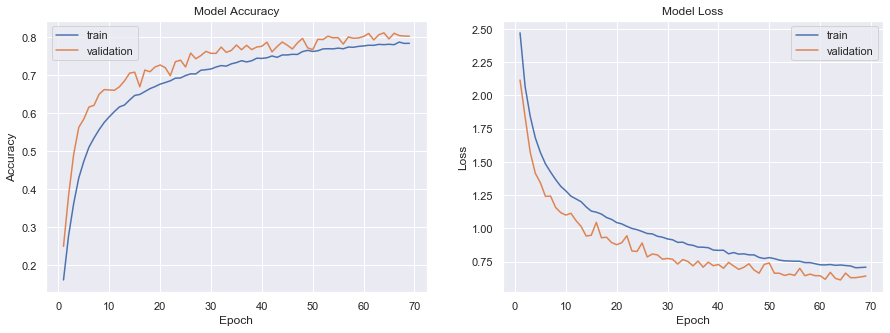

In [98]:
plot_model_history(history)

In [99]:
train_score = model_3.evaluate(X_train, y_train)
print('Train loss:', train_score[0])
print('Train accuracy:', train_score[1])

42000/42000 [==============================] - 9s 202us/step
Train loss: 0.5591443179334913
Train accuracy: 0.8274523615837097


In [100]:
test_score = model_3.evaluate(X_test, y_test)
print('Test loss:', test_score[0])
print('Test accuracy:', test_score[1])

18000/18000 [==============================] - 3s 189us/step
Test loss: 0.6515217265023125
Test accuracy: 0.8003888726234436


In [101]:
results_new=pd.DataFrame({'Model':['Model_3'], 'Hyper_Param':['Adam with LR'], 'Train_Loss': train_score[0], 'Train_Acc': train_score[1], 'Test_Loss': test_score[0], 'Test_Acc': test_score[1]},index={'10'})
results=pd.concat([results, results_new])
results

,Model,Hyper_Param,Train_Loss,Train_Acc,Test_Loss,Test_Acc
1,Model_1,SGD only,1.091981,0.662167,1.105584,0.659111
2,Model_1,Adam only,0.548772,0.827595,0.684544,0.796000
3,Model_1,SGD with LR,0.469252,0.856667,0.621222,0.815111
4,Model_1,Adam with LR,0.421270,0.871167,0.616926,0.821111
5,Model_2,SGD only,0.647617,0.797857,0.832365,0.741167
6,Model_2,Adam only,0.720108,0.781476,0.904731,0.738444
7,Model_2,SGD with LR,0.289768,0.915619,0.517300,0.848556
8,Model_2,Adam with LR,0.280583,0.918286,0.566924,0.839556
9,Model_3,SGD with LR,2.513166,0.111333,2.508593,0.110556
10,Model_3,Adam with LR,0.559144,0.827452,0.651522,0.800389


### ** Observation:
##### Model with dropout, batch normalization and Adam optimizer with Learning Rate 0.0001 performance is consistent in Train and Test.
##### Performance is not good when compared with all other models without dropout (#4 and #8). If increase in # of epochs, performance will increase.

### SGD optimizer with Learning Rate + Batch Normalization layer gives better results for Test 

###### *** Training the model with best parameters and predicting the results for some images 

In [108]:
model_2.compile(optimizer=sgd, loss='categorical_crossentropy', metrics=['accuracy'])

In [109]:
history=model_2.fit(X_train, y_train, validation_split=0.2, shuffle=True, batch_size=200, epochs=100, callbacks=[early_stopping], verbose=1)

Train on 33600 samples, validate on 8400 samples
Epoch 1/100
33600/33600 [==============================] - 18s 530us/step - loss: 0.2018 - accuracy: 0.9398 - val_loss: 0.5275 - val_accuracy: 0.8533
Epoch 2/100
33600/33600 [==============================] - 20s 584us/step - loss: 0.2004 - accuracy: 0.9396 - val_loss: 0.5264 - val_accuracy: 0.8539
Epoch 3/100
33600/33600 [==============================] - 16s 471us/step - loss: 0.2003 - accuracy: 0.9394 - val_loss: 0.5265 - val_accuracy: 0.8542
Epoch 4/100
33600/33600 [==============================] - 19s 567us/step - loss: 0.2009 - accuracy: 0.9381 - val_loss: 0.5258 - val_accuracy: 0.8537
Epoch 5/100
33600/33600 [==============================] - 17s 502us/step - loss: 0.1986 - accuracy: 0.9406 - val_loss: 0.5256 - val_accuracy: 0.8535
Epoch 6/100
33600/33600 [==============================] - 20s 583us/step - loss: 0.1993 - accuracy: 0.9402 - val_loss: 0.5253 - val_accuracy: 0.8537s: 0.2019 - accu
Epoch 7/100
33600/33600 [==========

In [110]:
test_score = model_2.evaluate(X_test, y_test)
print('Test loss:', test_score[0])
print('Test accuracy:', test_score[1])

18000/18000 [==============================] - 6s 335us/step
Test loss: 0.5315083712869221
Test accuracy: 0.8523889183998108


In [116]:
prediction=model_2.predict_classes(X_test)

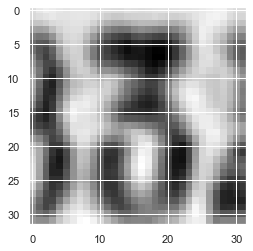

Label: 3


In [123]:
plt.imshow(X_test[250].reshape(32,32),cmap='gray')
plt.show()
print("Label: {}".format(prediction[250]))

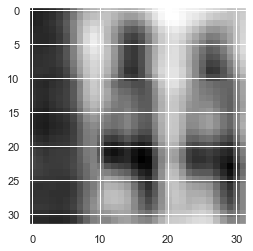

Label: 4


In [126]:
plt.imshow(X_test[350].reshape(32,32),cmap='gray')
plt.show()
print("Label: {}".format(prediction[350]))

### ** Above image was misclassified in KNN classifier, but this is correctly classified with DNN

### 5) Print the classification accuracy metrics (10 points)

In [136]:
y_test_new = []
for val in y_test:
    y_test_new.append(np.argmax(val))

In [138]:
from sklearn import metrics

#### ** Printing the Confusion Matrix

In [139]:
print(metrics.confusion_matrix(y_test_new,prediction))

[[1603   34   16   13   25   12   23   20   16   52]
 [  27 1595   31   24   50    7   17   43   22   12]
 [  19   23 1548   39   25   12    7   61   32   37]
 [  15   25   35 1385   18  118   16   35   45   27]
 [  17   50   25   15 1614   13   31    6   13   28]
 [  16   16   13   80   12 1493   53    9   46   30]
 [  35   20   17   18   32   71 1535   12   76   16]
 [  16   60   34   26   11    5   11 1619    7   19]
 [  30   31   26   51   14   37   91   16 1465   51]
 [  57   35   29   41   24   46   15   21   50 1486]]


#### ** Printing the Classification report

In [141]:
print(metrics.classification_report(y_test_new,prediction))

              precision    recall  f1-score   support

           0       0.87      0.88      0.88      1814
           1       0.84      0.87      0.86      1828
           2       0.87      0.86      0.87      1803
           3       0.82      0.81      0.81      1719
           4       0.88      0.89      0.89      1812
           5       0.82      0.84      0.83      1768
           6       0.85      0.84      0.85      1832
           7       0.88      0.90      0.89      1808
           8       0.83      0.81      0.82      1812
           9       0.85      0.82      0.83      1804

    accuracy                           0.85     18000
   macro avg       0.85      0.85      0.85     18000
weighted avg       0.85      0.85      0.85     18000



### Conclusion: Comparing performance of KNN and best of DNN classifiers

* KNN classifier for image data took more time to train and test. But performance of KNN classifier is very less for image data, accuracy is around 49% and recall rate for 1 is good (around 70%), recall rate for 3, 5, 6, 8 and 9 is less than 40%.

* Best fit DNN classifiers class level accuracy is around 85%, both recall and precision came out good (in the range of 81% to 90%). Least Recall is for class labels '3' and '8' and maximum is for class label ‘7’. Precision is least for class labels '3' and '5' and maximum for class labels '4' and '7'.

* DNN's with batch normalization and learning rate are quicker and achieved higher accuracy in less time when compared with DNN's without batch normalization.